In [1]:
# Requirements
%pip install pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the datasets
matches_df = pd.read_csv('https://raw.githubusercontent.com/Pankaj-Str/IPL-Data-Analysis-Case-Study/refs/heads/main/dataset/matches_data.csv')
deliveries_df = pd.read_csv('https://raw.githubusercontent.com/Pankaj-Str/IPL-Data-Analysis-Case-Study/refs/heads/main/dataset/deliveries_data.csv')



Using Matplotlib style: seaborn-v0_8
Q1: Batting strike rates (min 500 runs):
             strike_rate
batsman                
AD Russell       179.95
SP Narine        166.94
RR Pant          162.32
GJ Maxwell       155.54
CH Morris        153.39
Q1: Batting strike rates saved to 'batsman_strike_rates.csv'.
Q1: Plot saved to 'batsman_strike_rates.png'.


<Figure size 1000x600 with 0 Axes>

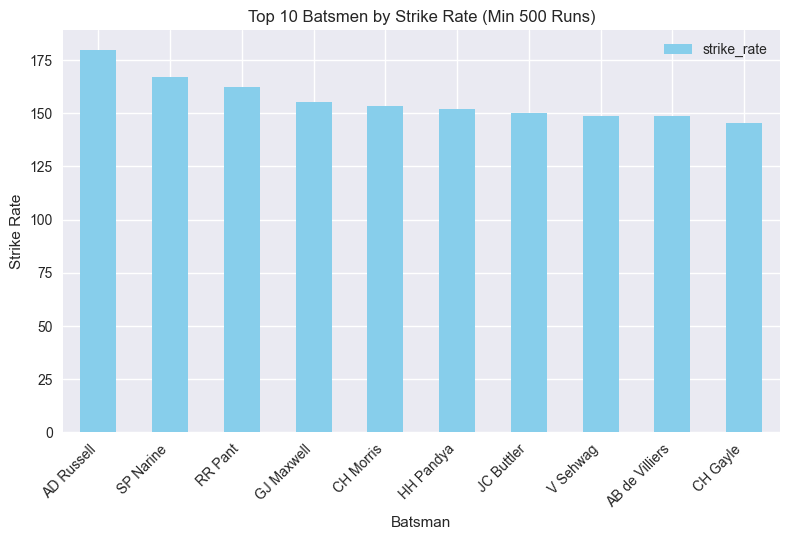

In [5]:

# Set up matplotlib style (use 'seaborn-v0_8' if available, else 'ggplot' or 'default')
available_styles = plt.style.available
style_to_use = 'seaborn-v0_8' if 'seaborn-v0_8' in available_styles else 'ggplot' if 'ggplot' in available_styles else 'default'
plt.style.use(style_to_use)
print(f"Using Matplotlib style: {style_to_use}")

# Question 1: Batting strike rate of each batsman (minimum 500 runs)
batsman_stats = deliveries_df.groupby('batsman').agg({
    'batsman_runs': 'sum',
    'ball': 'count'
})
batsman_stats['strike_rate'] = (batsman_stats['batsman_runs'] / batsman_stats['ball'] * 100).round(2)
batsman_stats = batsman_stats[batsman_stats['batsman_runs'] >= 500][['strike_rate']].sort_values('strike_rate', ascending=False)
print("Q1: Batting strike rates (min 500 runs):\n", batsman_stats.head())
batsman_stats.to_csv('batsman_strike_rates.csv')
print("Q1: Batting strike rates saved to 'batsman_strike_rates.csv'.")
# Plot top 10 batsmen by strike rate
plt.figure(figsize=(10, 6))
batsman_stats.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Batsmen by Strike Rate (Min 500 Runs)')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('batsman_strike_rates.png')
#plt.close()
print("Q1: Plot saved to 'batsman_strike_rates.png'.")
plt.show()


Q2: Team with highest powerplay run rate is Delhi Capitals with 8.50 runs per over.
Q2: Powerplay run rates saved to 'powerplay_run_rates.csv'.


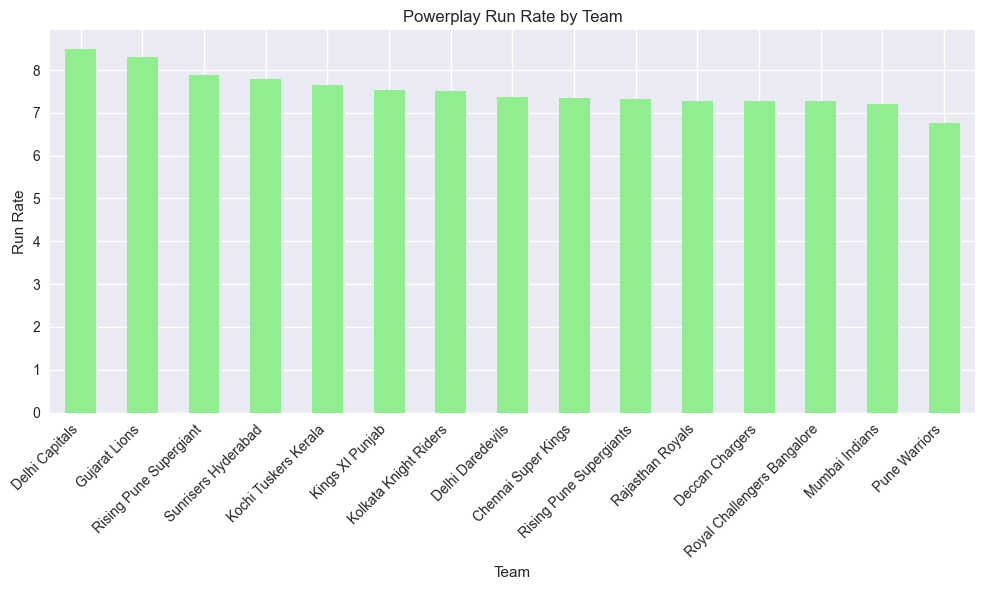

Q2: Plot saved to 'powerplay_run_rates.png'.


In [6]:
# Question 2: Team with highest run rate in powerplay overs (1–6)
powerplay_df = deliveries_df[deliveries_df['over'].between(1, 6)]
team_powerplay = powerplay_df.groupby('batting_team').agg({
    'total_runs': 'sum',
    'over': 'count'
})
team_powerplay['overs'] = team_powerplay['over'] / 6
team_powerplay['run_rate'] = (team_powerplay['total_runs'] / team_powerplay['overs']).round(2)
top_team = team_powerplay['run_rate'].idxmax()
top_run_rate = team_powerplay['run_rate'].max()
print(f"Q2: Team with highest powerplay run rate is {top_team} with {top_run_rate:.2f} runs per over.")
team_powerplay[['run_rate']].to_csv('powerplay_run_rates.csv')
print("Q2: Powerplay run rates saved to 'powerplay_run_rates.csv'.")
# Plot run rate by team
plt.figure(figsize=(10, 6))
team_powerplay['run_rate'].sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Powerplay Run Rate by Team')
plt.xlabel('Team')
plt.ylabel('Run Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#plt.savefig('powerplay_run_rates.png')
plt.close()
print("Q2: Plot saved to 'powerplay_run_rates.png'.")



Q3: Win percentage when winning toss:
 toss_winner
Chennai Super Kings            64.0
Deccan Chargers                44.0
Delhi Daredevils               46.0
Gujarat Lions                  67.0
Kings XI Punjab                41.0
Kochi Tuskers Kerala           50.0
Kolkata Knight Riders          56.0
Mumbai Indians                 56.0
Pune Warriors                  15.0
Rajasthan Royals               54.0
Rising Pune Supergiant         83.0
Rising Pune Supergiants        43.0
Royal Challengers Bangalore    50.0
Sunrisers Hyderabad            49.0
Name: toss_win_match_win, dtype: float64
Q3: Toss impact data saved to 'toss_impact.csv'.


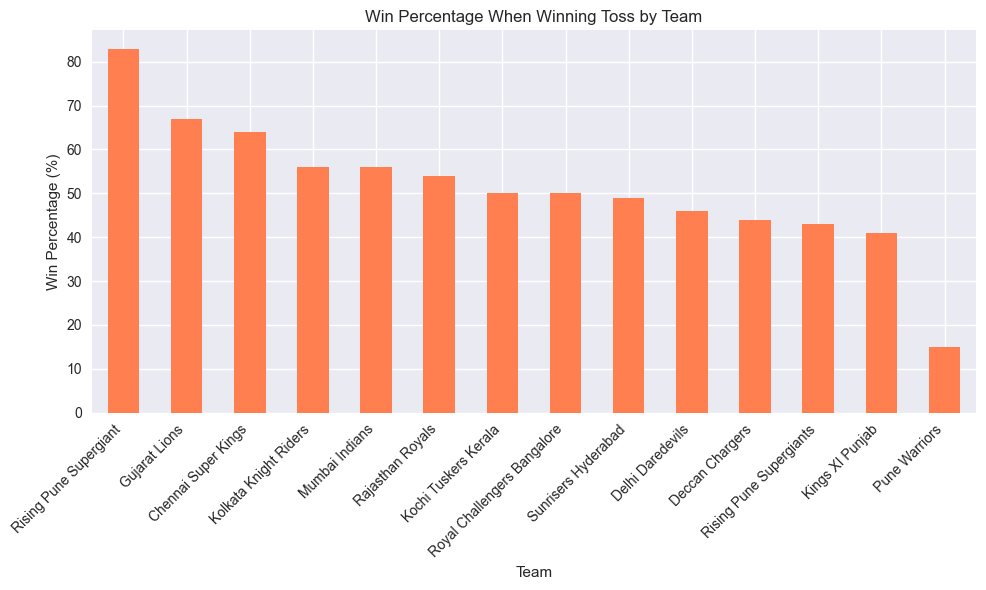

Q3: Plot saved to 'toss_impact.png'.


In [7]:
# Question 3: Impact of toss win on match outcomes
matches_df['toss_win_match_win'] = matches_df['toss_winner'] == matches_df['winner']
toss_impact = matches_df.groupby('toss_winner')['toss_win_match_win'].mean().round(2) * 100
print("Q3: Win percentage when winning toss:\n", toss_impact)
toss_impact.to_csv('toss_impact.csv')
print("Q3: Toss impact data saved to 'toss_impact.csv'.")
# Plot toss impact
plt.figure(figsize=(10, 6))
toss_impact.sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Win Percentage When Winning Toss by Team')
plt.xlabel('Team')
plt.ylabel('Win Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('toss_impact.png')
plt.show()
plt.close()
print("Q3: Plot saved to 'toss_impact.png'.")

Q4: Bowler with best death overs economy is R Ashwin with 7.56 runs per over.
Q4: Death overs economy rates saved to 'death_overs_economy.csv'.


<Figure size 1000x600 with 0 Axes>

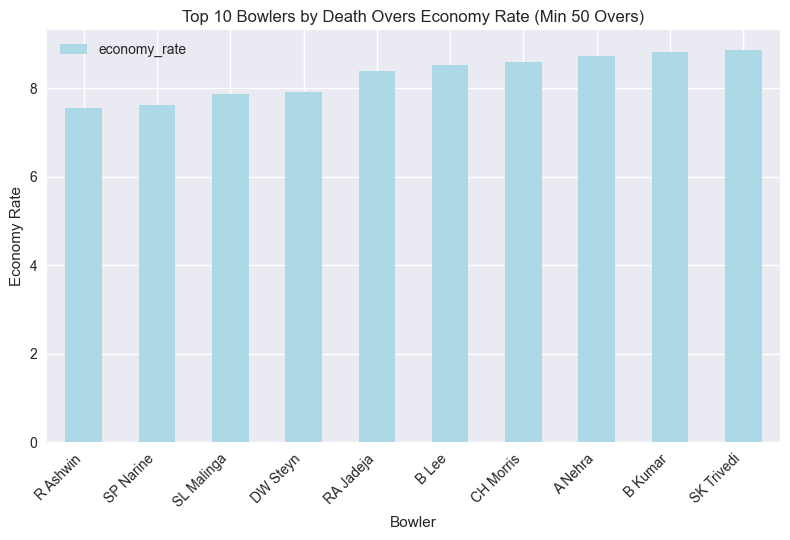

In [8]:
# Question 4: Bowler with best economy rate in death overs (16–20, min 50 overs)
death_overs_df = deliveries_df[deliveries_df['over'].between(16, 20)]
bowler_stats = death_overs_df.groupby('bowler').agg({
    'total_runs': 'sum',
    'over': 'count'
})
bowler_stats['overs'] = bowler_stats['over'] / 6
bowler_stats['economy_rate'] = (bowler_stats['total_runs'] / bowler_stats['overs']).round(2)
bowler_stats = bowler_stats[bowler_stats['overs'] >= 50][['economy_rate']].sort_values('economy_rate')
top_bowler = bowler_stats['economy_rate'].idxmin()
top_economy = bowler_stats['economy_rate'].min()
print(f"Q4: Bowler with best death overs economy is {top_bowler} with {top_economy:.2f} runs per over.")
bowler_stats.to_csv('death_overs_economy.csv')
print("Q4: Death overs economy rates saved to 'death_overs_economy.csv'.")
# Plot top 10 bowlers by economy rate
plt.figure(figsize=(10, 6))
bowler_stats.head(10).plot(kind='bar', color='lightblue')
plt.title('Top 10 Bowlers by Death Overs Economy Rate (Min 50 Overs)')
plt.xlabel('Bowler')
plt.ylabel('Economy Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# plt.savefig('death_overs_economy.png')
plt.show()
plt.close()
#print("Q4: Plot saved to 'death_overs_economy.png'.")

Q5: Win percentage when batting first:
 season
2008    48.0
2009    58.0
2010    52.0
2011    52.0
2012    45.0
2013    47.0
2014    50.0
2015    47.0
2016    57.0
2017    58.0
Name: batting_first_won, dtype: float64
Q5: Batting first impact saved to 'batting_first_impact.csv'.


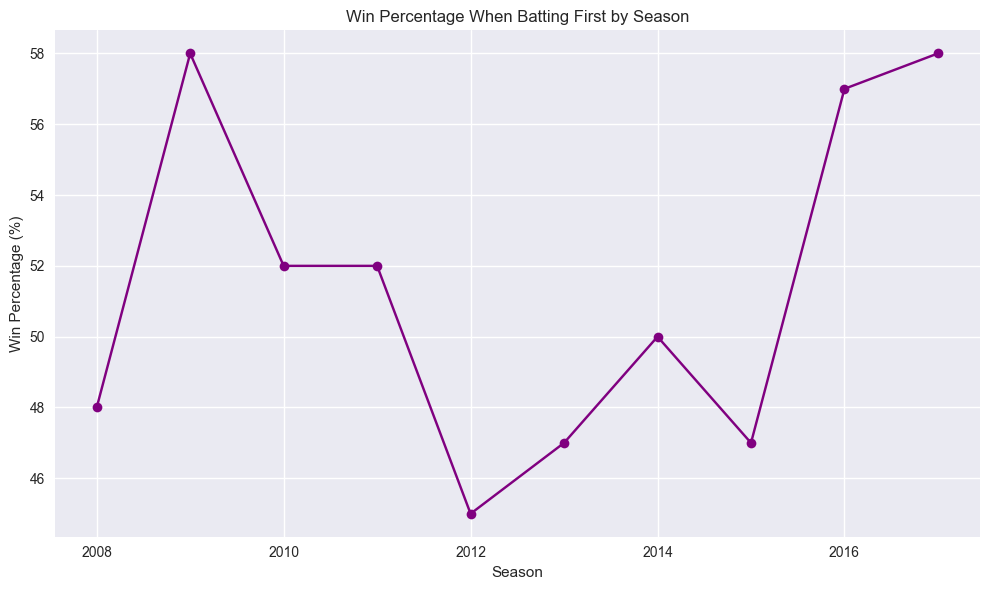

In [9]:
# Question 5: Impact of batting first vs. second on match outcomes
matches_df['batting_first'] = matches_df['toss_decision'].map({'bat': True, 'field': False})
matches_df['batting_first_won'] = matches_df.apply(
    lambda x: x['winner'] == x['team1'] if x['batting_first'] else x['winner'] == x['team2'], axis=1
)
batting_impact = matches_df.groupby('season')['batting_first_won'].mean().round(2) * 100
print("Q5: Win percentage when batting first:\n", batting_impact)
batting_impact.to_csv('batting_first_impact.csv')
print("Q5: Batting first impact saved to 'batting_first_impact.csv'.")
# Plot batting first win percentage
plt.figure(figsize=(10, 6))
batting_impact.plot(kind='line', marker='o', color='purple')
plt.title('Win Percentage When Batting First by Season')
plt.xlabel('Season')
plt.ylabel('Win Percentage (%)')
plt.grid(True)
plt.tight_layout()
#plt.savefig('batting_first_impact.png')
plt.show()
plt.close()
#print("Q5: Plot saved to 'batting_first_impact.png'.")



Q6: Batsman with highest average against a bowler is V Kohli against R Ashwin with 153.00.
Q6: Batsman-bowler averages saved to 'batsman_bowler_avg.csv'.


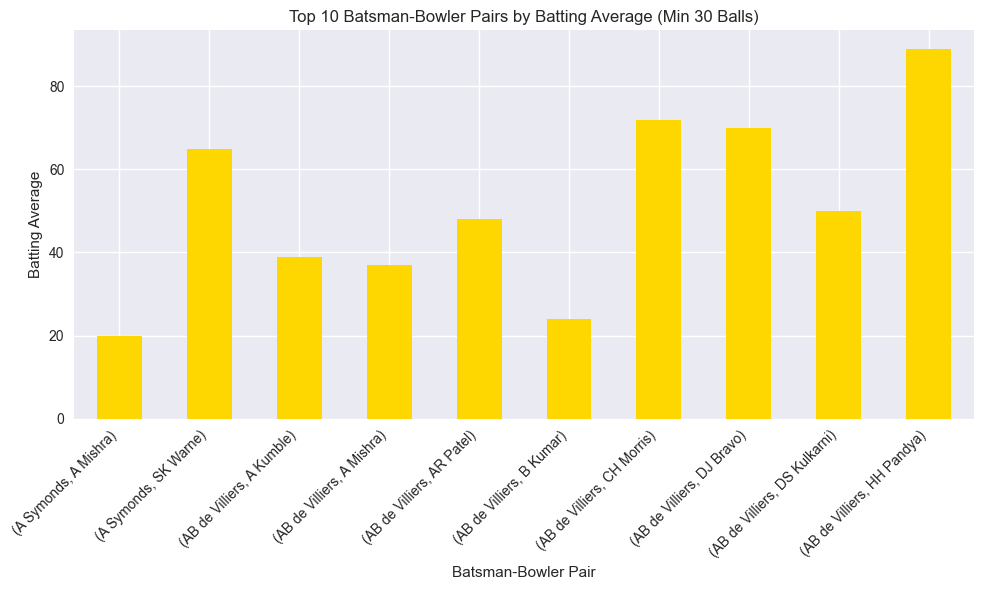

Q6: Plot saved to 'batsman_bowler_avg.png'.


In [10]:
# Question 6: Batsman with highest average against a specific bowler (min 30 balls)
batsman_bowler = deliveries_df.groupby(['batsman', 'bowler']).agg({
    'batsman_runs': 'sum',
    'ball': 'count',
    'player_dismissed': lambda x: x.notna().sum()
})
batsman_bowler = batsman_bowler[batsman_bowler['ball'] >= 30]
batsman_bowler['batting_avg'] = (batsman_bowler['batsman_runs'] / batsman_bowler['player_dismissed'].replace(0, 1)).round(2)
top_batsman_bowler = batsman_bowler['batting_avg'].idxmax()
top_avg = batsman_bowler['batting_avg'].max()
print(f"Q6: Batsman with highest average against a bowler is {top_batsman_bowler[0]} against {top_batsman_bowler[1]} with {top_avg:.2f}.")
batsman_bowler[['batting_avg']].to_csv('batsman_bowler_avg.csv')
print("Q6: Batsman-bowler averages saved to 'batsman_bowler_avg.csv'.")
# Plot top 10 batsman-bowler pairs by average
plt.figure(figsize=(10, 6))
batsman_bowler['batting_avg'].head(10).plot(kind='bar', color='gold')
plt.title('Top 10 Batsman-Bowler Pairs by Batting Average (Min 30 Balls)')
plt.xlabel('Batsman-Bowler Pair')
plt.ylabel('Batting Average')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# plt.savefig('batsman_bowler_avg.png')
plt.show()
plt.close()
print("Q6: Plot saved to 'batsman_bowler_avg.png'.")

Q7: Dismissal types by team and season:
 dismissal_kind                bowled  caught  caught and bowled  hit wicket  \
season batting_team                                                           
2008   Chennai Super Kings        11      54                  3           0   
       Deccan Chargers            16      58                  2           0   
       Delhi Daredevils           16      46                  0           0   
       Kings XI Punjab             9      48                  4           0   
       Kolkata Knight Riders      17      50                  3           0   

dismissal_kind                lbw  obstructing the field  retired hurt  \
season batting_team                                                      
2008   Chennai Super Kings      4                      0             0   
       Deccan Chargers          5                      0             0   
       Delhi Daredevils         3                      0             0   
       Kings XI Punjab          6  

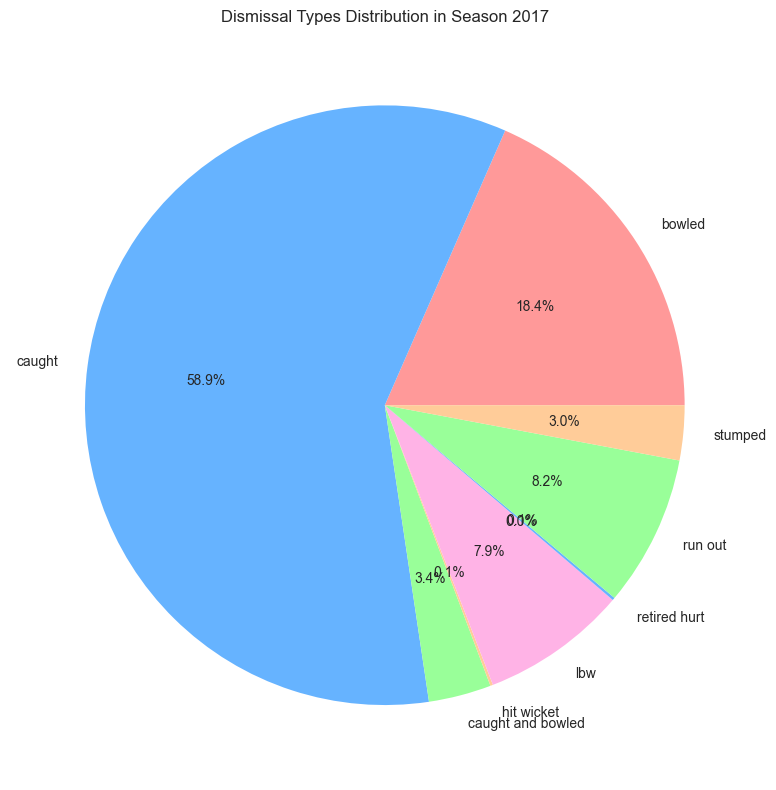

Q7: Plot saved to 'dismissal_types.png'.


In [11]:

# Question 7: Dismissal types by batting team and season
deliveries_with_season = deliveries_df.merge(matches_df[['id', 'season']], left_on='match_id', right_on='id')
dismissal_types = deliveries_with_season.groupby(['season', 'batting_team', 'dismissal_kind']).size().unstack(fill_value=0)
print("Q7: Dismissal types by team and season:\n", dismissal_types.head())
dismissal_types.to_csv('dismissal_types.csv')
print("Q7: Dismissal types saved to 'dismissal_types.csv'.")
# Plot dismissal types for a specific season (e.g., latest season)
latest_season = dismissal_types.index.get_level_values('season').max()
dismissal_types.xs(latest_season, level='season').sum().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ffb3e6'])
plt.title(f'Dismissal Types Distribution in Season {latest_season}')
plt.ylabel('')
plt.tight_layout()
# plt.savefig('dismissal_types.png')
plt.show()
plt.close()
print("Q7: Plot saved to 'dismissal_types.png'.")


C:\Users\comp\AppData\Local\Temp\ipykernel_11476\4089222799.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['venue'] = le_venue.fit_transform(features['venue'])
C:\Users\comp\AppData\Local\Temp\ipykernel_11476\4089222799.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['toss_decision'] = le_toss.fit_transform(features['toss_decision'])
C:\Users\comp\AppData\Local\Temp\ipykernel_11476\4089222799.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Q8: Logistic regression model accuracy: 0.56
Q8: Logistic regression coefficients saved to 'logistic_regression_coefficients.csv'.


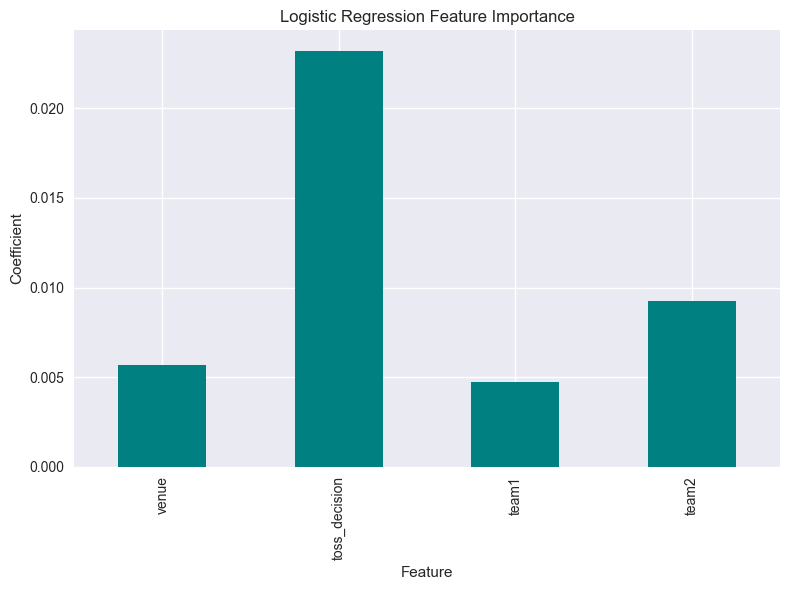

Q8: Plot saved to 'logistic_regression_coefficients.png'.


In [12]:
# Question 8: Logistic regression to predict team winning based on venue and toss decision
matches_df['team1_won'] = (matches_df['winner'] == matches_df['team1']).astype(int)
features = matches_df[['venue', 'toss_decision', 'team1', 'team2']]
le_venue = LabelEncoder()
le_toss = LabelEncoder()
le_team1 = LabelEncoder()
le_team2 = LabelEncoder()
features['venue'] = le_venue.fit_transform(features['venue'])
features['toss_decision'] = le_toss.fit_transform(features['toss_decision'])
features['team1'] = le_team1.fit_transform(features['team1'])
features['team2'] = le_team2.fit_transform(features['team2'])
X = features[['venue', 'toss_decision', 'team1', 'team2']]
y = matches_df['team1_won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Q8: Logistic regression model accuracy: {accuracy:.2f}")
pd.DataFrame({
    'Feature': ['venue', 'toss_decision', 'team1', 'team2'],
    'Coefficient': model.coef_[0]
}).to_csv('logistic_regression_coefficients.csv')
print("Q8: Logistic regression coefficients saved to 'logistic_regression_coefficients.csv'.")
# Plot feature importance
plt.figure(figsize=(8, 6))
pd.Series(model.coef_[0], index=['venue', 'toss_decision', 'team1', 'team2']).plot(kind='bar', color='teal')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.tight_layout()
# plt.savefig('logistic_regression_coefficients.png')
plt.show()
plt.close()
print("Q8: Plot saved to 'logistic_regression_coefficients.png'.")